# **Learning Disorder**

# Raw Data for Learning Disorder

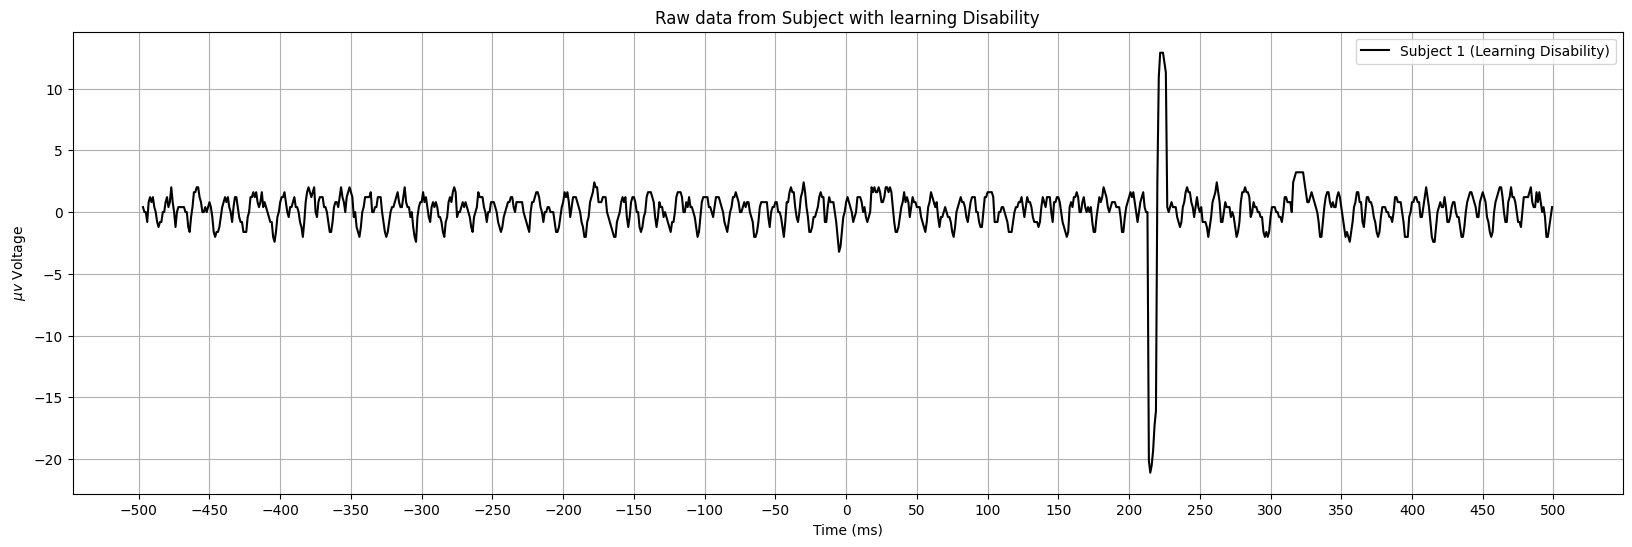

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for one of the files for learning disability
learning_disability_file = '/content/drive/MyDrive/paperpub/LearningDisability/1edit.csv'

try:
    # Read the CSV file for learning disability into a DataFrame
    df_learning = pd.read_csv(learning_disability_file, encoding='latin-1')

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_learning = df_learning['x'].values
    y_values_learning = df_learning['y'].values

    # Convert time to milliseconds
    x_values_learning_ms = x_values_learning * 1000.0  # Convert seconds to milliseconds

    # Plotting the raw EEG data for learning disability
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_learning_ms, y_values_learning, color='black', label='Subject 1 (Learning Disability)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu v$ Voltage')
    plt.title('Raw data from Subject with learning Disability')
    plt.legend()
    plt.grid(True)

    # Add x-axis ticks at intervals of 50 milliseconds from -500 to 500 milliseconds
    plt.xticks(range(-500, 501, 50))

    plt.show()

except FileNotFoundError:
    print("The specified CSV file for learning disability does not exist.")
except pd.errors.EmptyDataError:
    print("The CSV file for learning disability is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing the CSV file for learning disability. Make sure the file is properly formatted.")
except Exception as e:
    print(f"An error occurred: {e}")


# Filtered ErrP graph For Learning Disorder

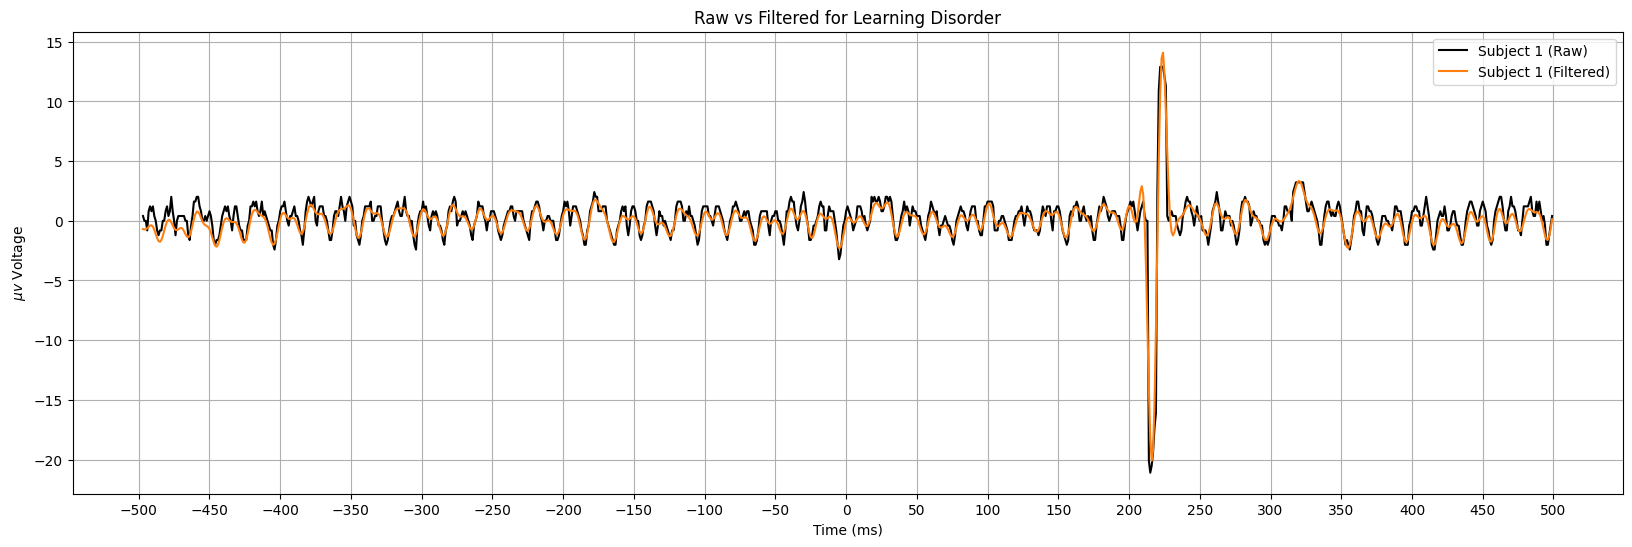

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    Create a Butterworth bandpass filter.

    Parameters:
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - b, a: Numerator (b) and denominator (a) of the filter.
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a Butterworth bandpass filter to EEG data.

    Parameters:
    - data: Input EEG data.
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - y: Filtered EEG data.
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define the file path for one of the files for learning disability
learning_disability_file = '/content/drive/MyDrive/paperpub/LearningDisability/1edit.csv'

# Define the Butterworth filter parameters
lowcut = 1.0  # Lower cutoff frequency
highcut = 50.0  # Upper cutoff frequency
fs = 500.0  # Sampling frequency
order = 5  # Filter order

try:
    # Read the CSV file for learning disability into a DataFrame
    df_learning = pd.read_csv(learning_disability_file, encoding='latin-1')

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_learning = df_learning['x'].values
    y_values_learning = df_learning['y'].values

    # Convert time to milliseconds
    x_values_learning_ms = x_values_learning * 1000.0  # Convert seconds to milliseconds

    # Apply Butterworth bandpass filter to EEG data for learning disability
    y_values_filtered = butter_bandpass_filter(y_values_learning, lowcut, highcut, fs, order)

    # Plotting the raw and filtered EEG data for learning disability
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_learning_ms, y_values_learning, color='black', label='Subject 1 (Raw)')
    plt.plot(x_values_learning_ms, y_values_filtered, color='#ff7f0e', label='Subject 1 (Filtered)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu v$ Voltage')
    plt.title('Raw vs Filtered for Learning Disorder')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(-500, 501, 50))
    plt.show()

except FileNotFoundError:
    print("The specified CSV file for learning disability does not exist.")
except pd.errors.EmptyDataError:
    print("The CSV file for learning disability is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing the CSV file for learning disability. Make sure the file is properly formatted.")
except Exception as e:
    print(f"An error occurred: {e}")


# Comaprison between healthy and Learning Disorder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


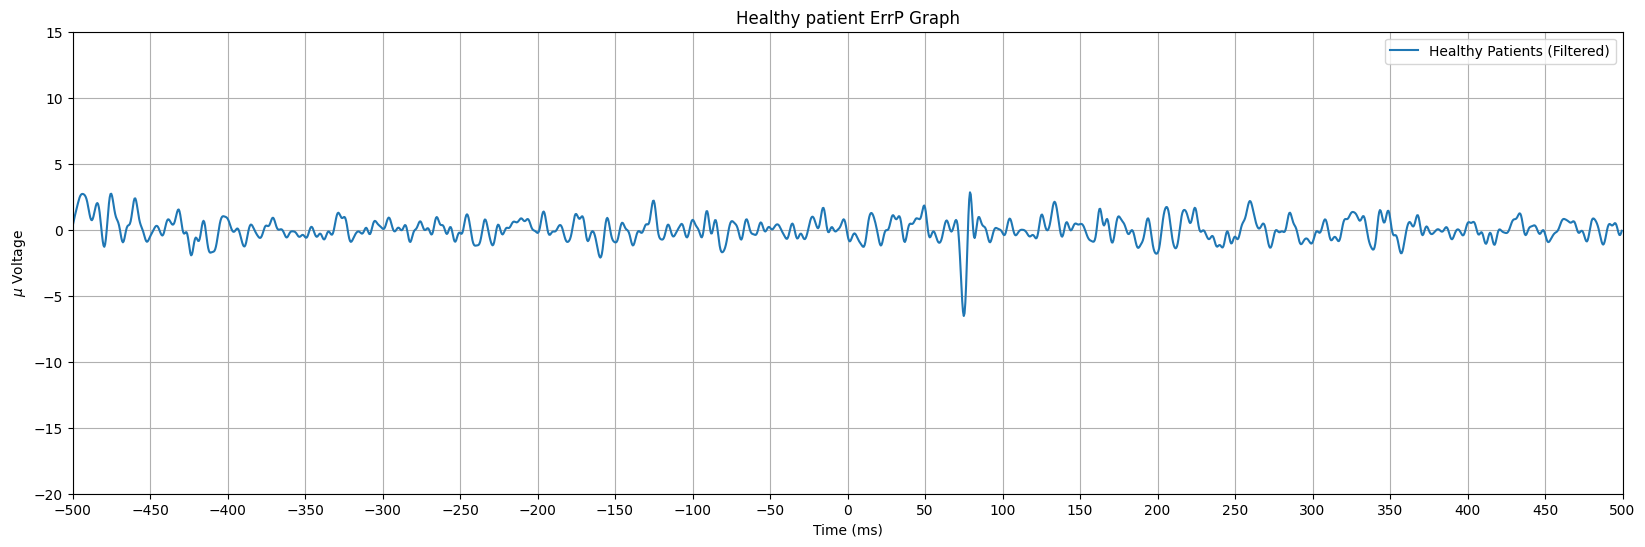

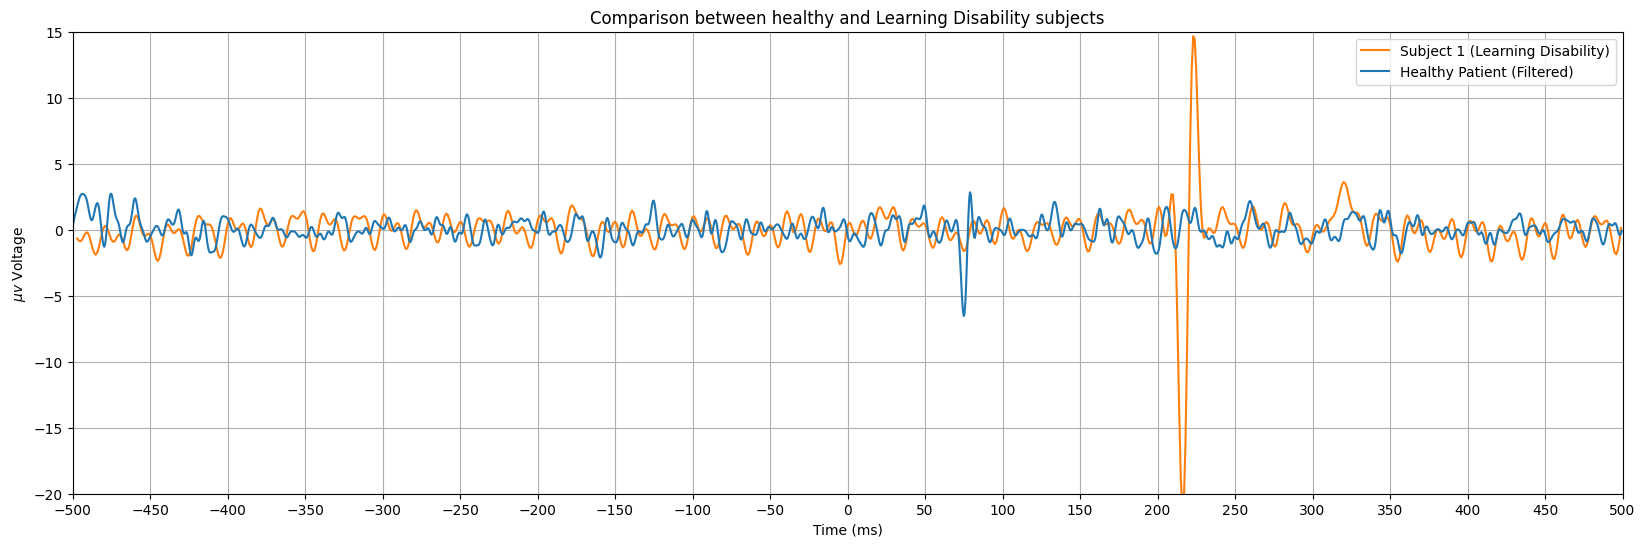

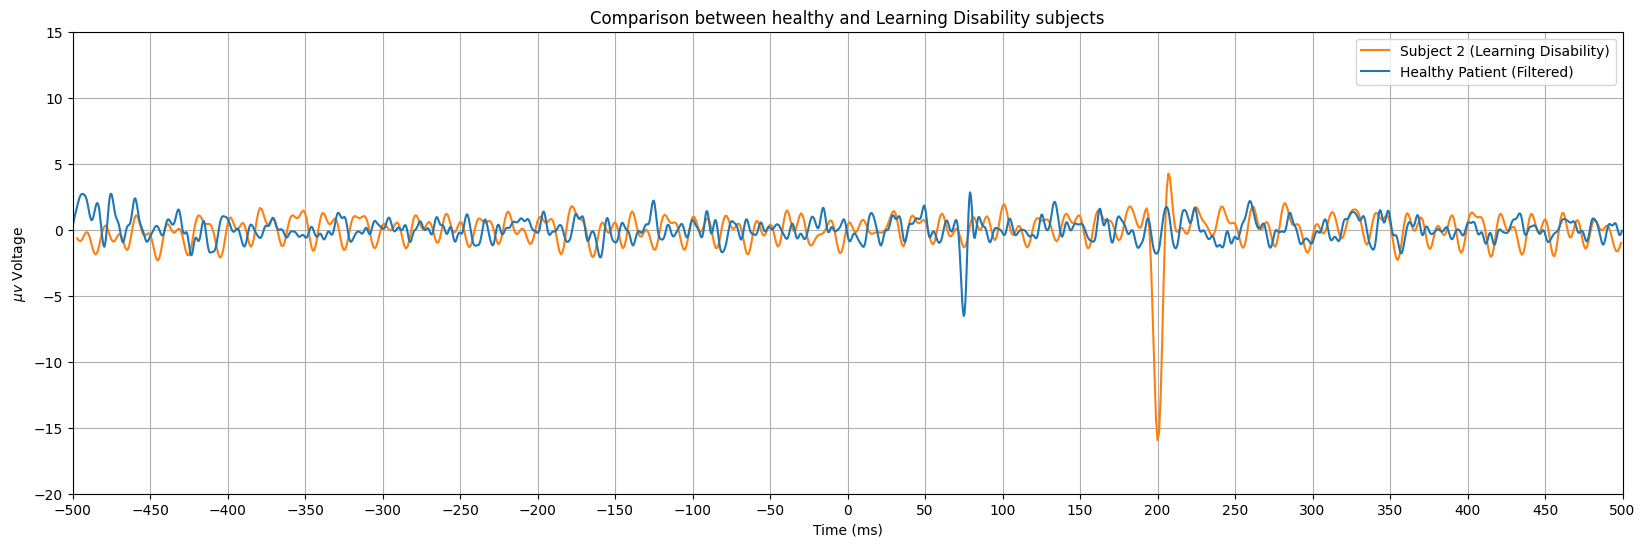

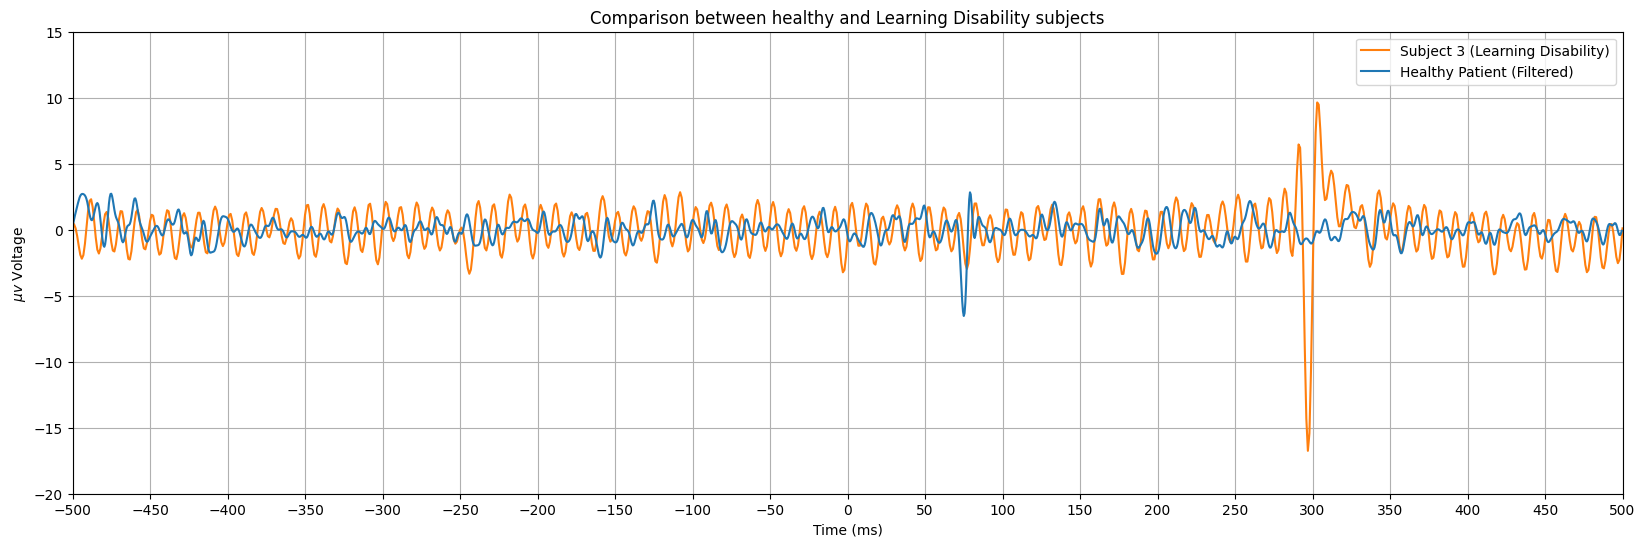

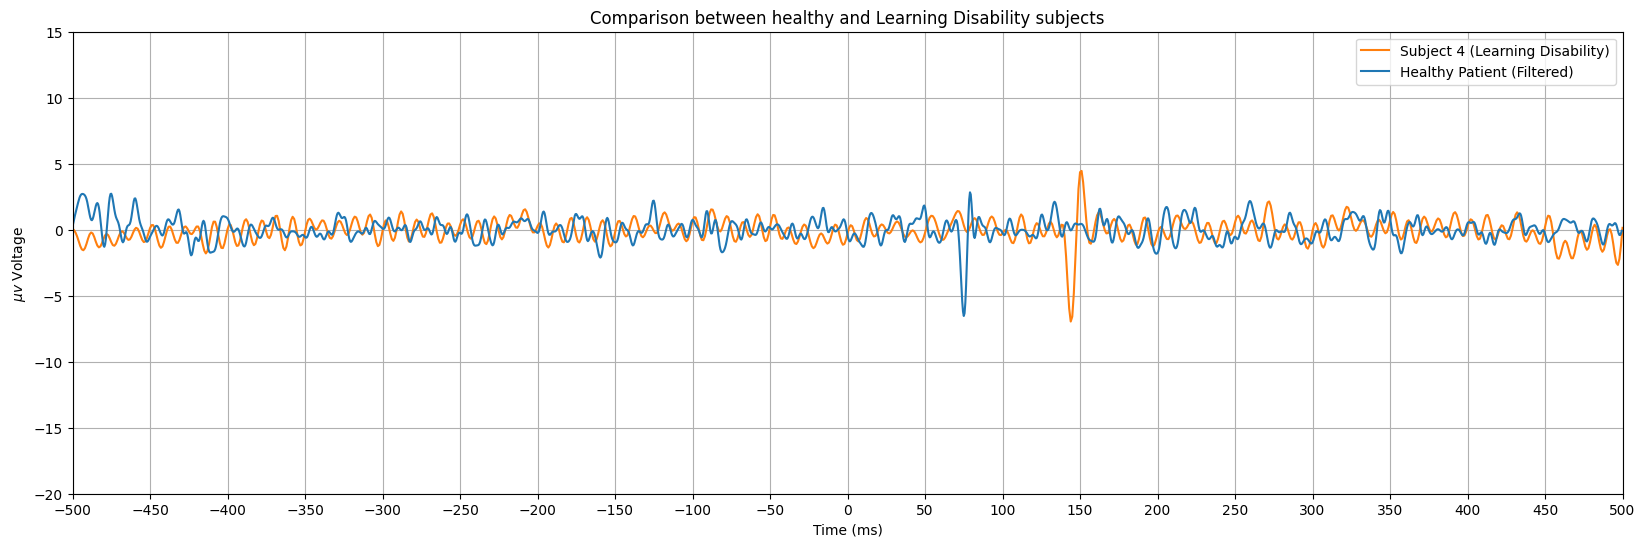

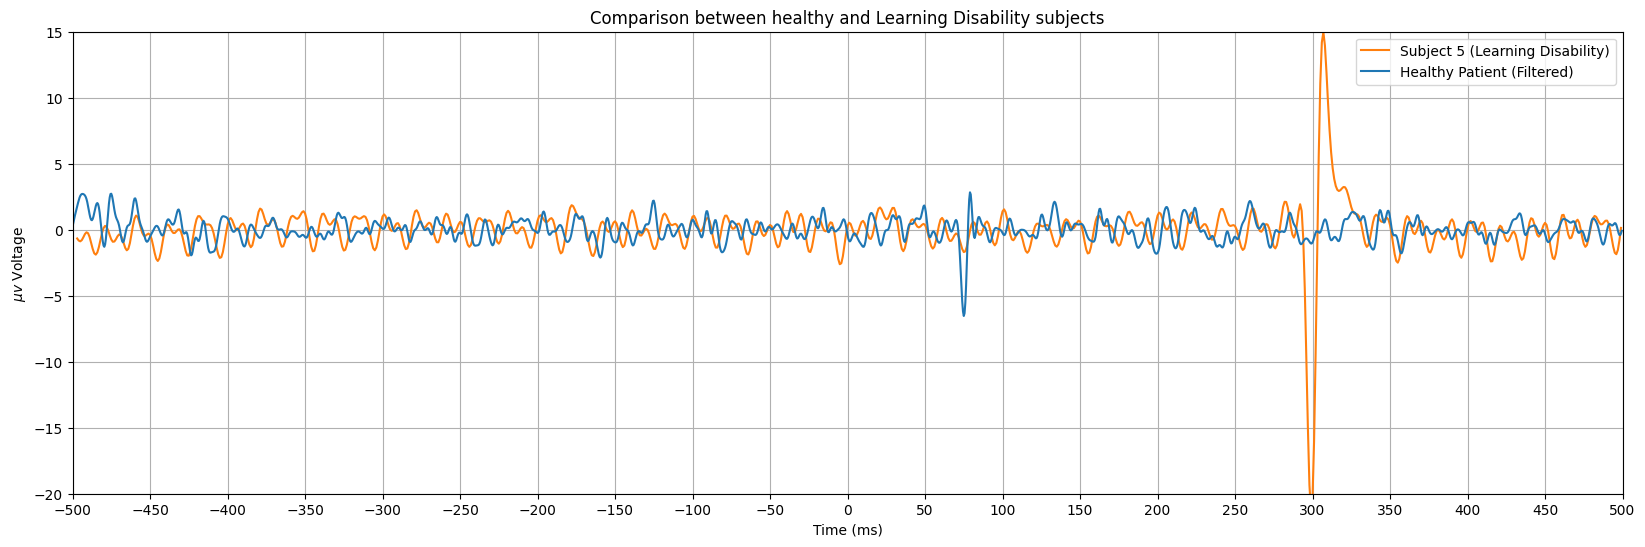

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    Create a Butterworth bandpass filter.

    Parameters:
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - b, a: Numerator (b) and denominator (a) of the filter.
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a Butterworth bandpass filter to EEG data.

    Parameters:
    - data: Input EEG data.
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - y: Filtered EEG data.
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

try:
    # Mount Google Drive to access files if needed
    from google.colab import drive
    drive.mount('/content/drive')

    # Define the file path for CSV 7 (ERRP of healthy patients)
    healthy_patient_file = '/content/drive/MyDrive/paperpub/ref/ref1new.csv'

    # List of file paths for subjects with learning disability
    learning_disability_files = ['/content/drive/MyDrive/paperpub/LearningDisability/1edit.csv',
                                 '/content/drive/MyDrive/paperpub/LearningDisability/2edit.csv',
                                 '/content/drive/MyDrive/paperpub/LearningDisability/3.csv',
                                 '/content/drive/MyDrive/paperpub/LearningDisability/4editlearning.csv',
                                 '/content/drive/MyDrive/paperpub/LearningDisability/5.csv']

    # Sampling frequency
    fs = 450.0

    # Cutoff frequencies for the bandpass filter
    lowcut = 1.0
    highcut = 50.0

    # Read the CSV file for healthy patients into a DataFrame
    df_healthy = pd.read_csv(healthy_patient_file, encoding='latin-1')

    # Check if 'x' and 'y' columns exist in the DataFrame
    if 'x' not in df_healthy.columns or 'y' not in df_healthy.columns:
        raise ValueError("The columns 'x' and 'y' do not exist in the healthy patient DataFrame.")

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_healthy = df_healthy['x'].values
    y_values_healthy = df_healthy['y'].values

    # Convert time to milliseconds
    x_values_healthy_ms = x_values_healthy * 1000.0  # Convert seconds to milliseconds

    # Apply Butterworth bandpass filter to EEG data
    y_values_healthy_filtered = butter_bandpass_filter(y_values_healthy, lowcut, highcut, fs)

    # Plotting graph for healthy patients (CSV 7)
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_healthy_ms, y_values_healthy_filtered, color='#1f77b4', label='Healthy Patients (Filtered)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu $ Voltage')
    plt.title('Healthy patient ErrP Graph')
    plt.legend()
    plt.grid(True)
    plt.ylim(-20, 15)  # Set y-axis limits
    plt.xlim(-500, 500)  # Set x-axis limits from -500 ms to 500 ms
    plt.xticks(np.arange(-500, 501, 50))  # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
    plt.show()

    # Iterate over each file path for subjects with learning disability
    for idx, learning_file in enumerate(learning_disability_files, start=1):
        # Read the CSV file for subjects with learning disability into a DataFrame
        df_learning = pd.read_csv(learning_file, encoding='latin-1')

        # Check if 'x' and 'y' columns exist in the DataFrame
        if 'x' not in df_learning.columns or 'y' not in df_learning.columns:
            raise ValueError(f"The columns 'x' and 'y' do not exist in the learning disability DataFrame {idx}.")

        # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
        x_values_learning = df_learning['x'].values
        y_values_learning = df_learning['y'].values

        # Convert time to milliseconds
        x_values_learning_ms = x_values_learning * 1000.0  # Convert seconds to milliseconds

        # Apply Butterworth bandpass filter to EEG data
        y_values_learning_filtered = butter_bandpass_filter(y_values_learning, lowcut, highcut, fs)

        # Plotting individual graph for subjects with learning disability compared to healthy patients (CSV 7)
        plt.figure(figsize=(20, 6))
        plt.plot(x_values_learning_ms, y_values_learning_filtered, color='#ff7f0e', label=f'Subject {idx} (Learning Disability)')
        plt.plot(x_values_healthy_ms, y_values_healthy_filtered, color='#1f77b4', label='Healthy Patient (Filtered)')
        plt.xlabel('Time (ms)')
        plt.ylabel('$\mu v$ Voltage ')
        plt.legend()
        plt.title('Comparison between healthy and Learning Disability subjects')
        plt.grid(True)
        plt.ylim(-20, 15)  # Set y-axis limits
        plt.xlim(-500, 500)  # Set x-axis limits from -500 ms to 500 ms
        plt.xticks(np.arange(-500, 501, 50))  # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
        plt.show()

except FileNotFoundError:
    print("One of the specified CSV files does not exist.")
except pd.errors.EmptyDataError:
    print("One of the CSV files is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing one of the CSV files. Make sure the files are properly formatted.")
except ValueError as ve:
    print(ve)
except Exception as e:
    print(f"An error occurred: {e}")


# **Hyper Activity**

# Raw data for Hyper activity

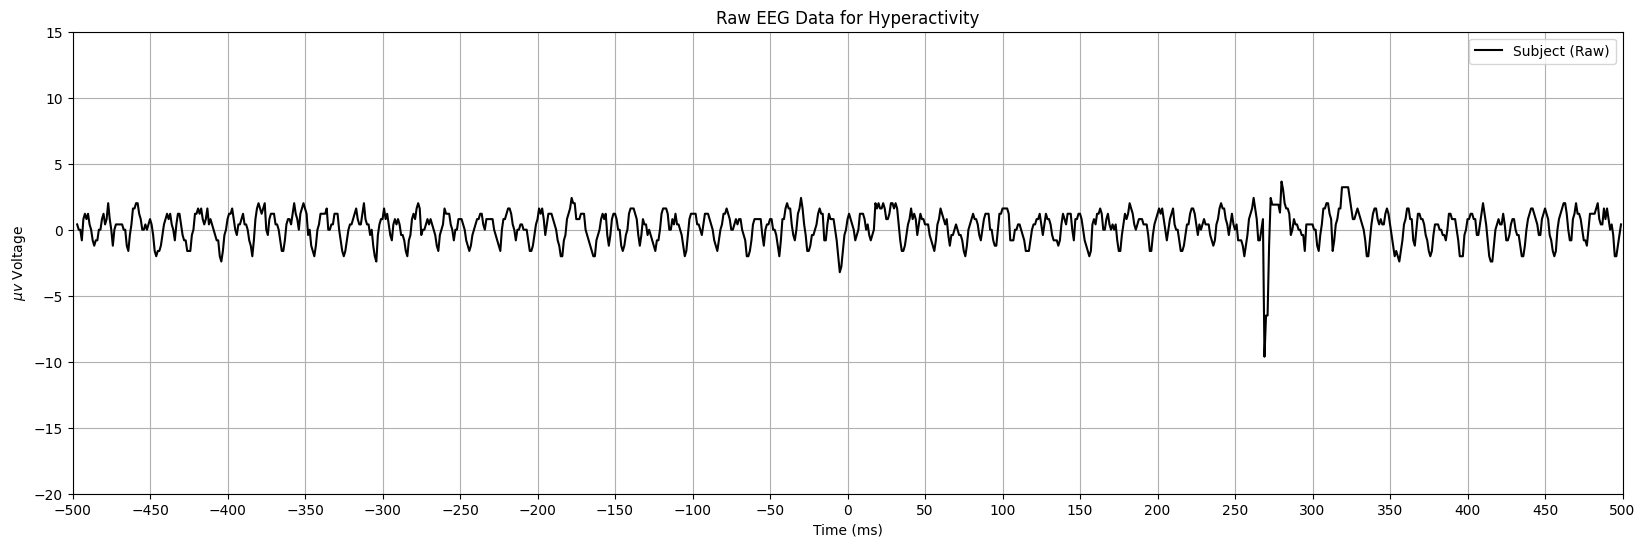

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for one of the files for hyperactivity
hyperactivity_file = '/content/drive/MyDrive/paperpub/HyperActivity/H1newedit.csv'

try:
    # Read the CSV file for hyperactivity into a DataFrame
    df_hyperactivity = pd.read_csv(hyperactivity_file, encoding='latin-1')

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_hyperactivity = df_hyperactivity['x'].values
    y_values_hyperactivity = df_hyperactivity['y'].values

    # Convert time to milliseconds
    x_values_hyperactivity_ms = x_values_hyperactivity * 1000.0  # Convert seconds to milliseconds

    # Plotting the raw EEG data for hyperactivity
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_hyperactivity_ms, y_values_hyperactivity, color='black', label='Subject (Raw)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu v$ Voltage')
    plt.ylim(-20, 15)  # Set y-axis limits
    plt.legend()
    plt.grid(True)
    plt.title('Raw EEG Data for Hyperactivity')

    # Set x-axis limits from -500 ms to 500 ms
    plt.xlim(-500, 500)

    # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
    plt.xticks(range(-500, 501, 50))

    plt.show()

except FileNotFoundError:
    print("The specified CSV file for hyperactivity does not exist.")
except pd.errors.EmptyDataError:
    print("The CSV file for hyperactivity is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing the CSV file for hyperactivity. Make sure the file is properly formatted.")
except Exception as e:
    print(f"An error occurred: {e}")


# Raw Vs Filtered

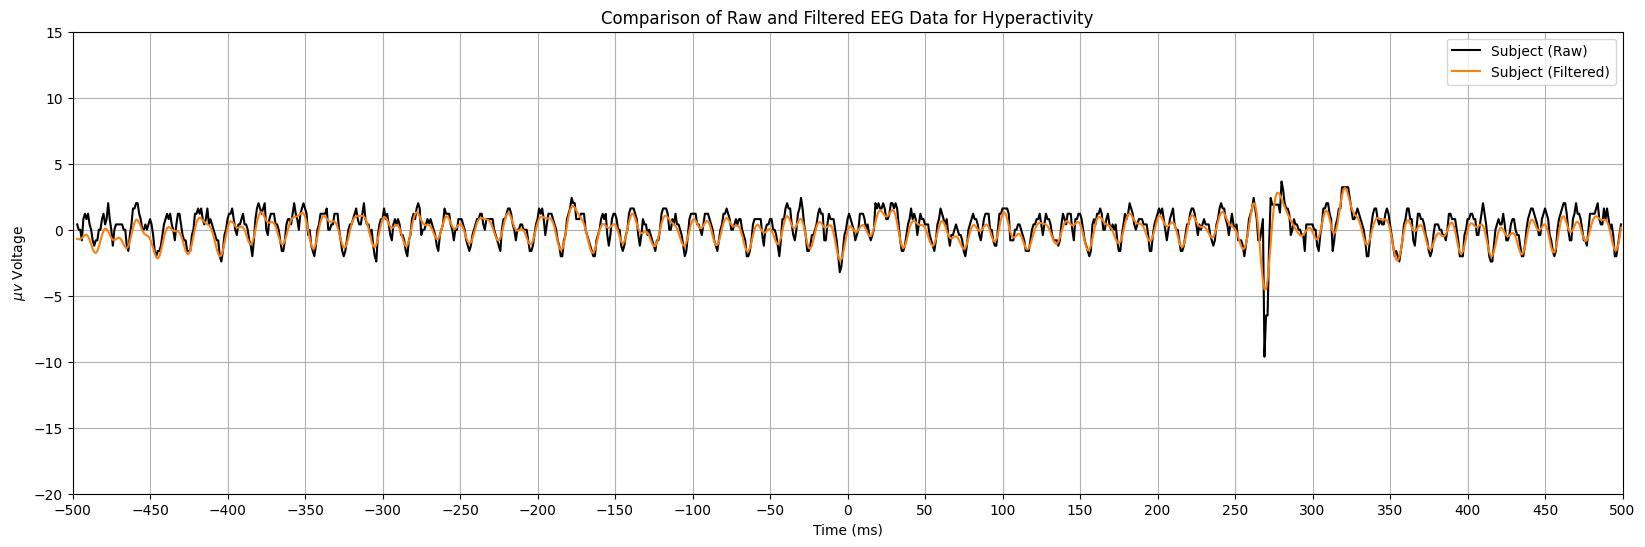

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    Create a Butterworth bandpass filter.

    Parameters:
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - b, a: Numerator (b) and denominator (a) of the filter.
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a Butterworth bandpass filter to EEG data.

    Parameters:
    - data: Input EEG data.
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - y: Filtered EEG data.
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define the file path for one of the files for hyperactivity
hyperactivity_file = '/content/drive/MyDrive/paperpub/HyperActivity/H1newedit.csv'

try:
    # Read the CSV file for hyperactivity into a DataFrame
    df_hyperactivity = pd.read_csv(hyperactivity_file, encoding='latin-1')

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_hyperactivity = df_hyperactivity['x'].values
    y_values_hyperactivity = df_hyperactivity['y'].values

    # Sampling frequency for EEG data
    fs = 500.0  # Sampling frequency

    # Cutoff frequencies for the bandpass filter
    lowcut = 1.0  # Low cutoff frequency
    highcut = 50.0  # High cutoff frequency

    # Convert time axis to milliseconds
    x_values_hyperactivity_ms = x_values_hyperactivity * 1000.0

    # Apply Butterworth bandpass filter to EEG data for hyperactivity
    y_values_hyperactivity_filtered = butter_bandpass_filter(y_values_hyperactivity, lowcut, highcut, fs)

    # Plotting the raw and filtered EEG data for hyperactivity
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_hyperactivity_ms, y_values_hyperactivity, color='black', label='Subject (Raw)')
    plt.plot(x_values_hyperactivity_ms, y_values_hyperactivity_filtered, color='#ff7f0e', label='Subject (Filtered)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu v$ Voltage')
    plt.ylim(-20, 15)  # Set y-axis limits

    # Set x-axis limits from -500 ms to 500 ms
    plt.xlim(-500, 500)

    # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
    plt.xticks(range(-500, 501, 50))

    plt.legend()
    plt.grid(True)
    plt.title('Comparison of Raw and Filtered EEG Data for Hyperactivity')
    plt.show()

except FileNotFoundError:
    print("The specified CSV file for hyperactivity does not exist.")
except pd.errors.EmptyDataError:
    print("The CSV file for hyperactivity is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing the CSV file for hyperactivity. Make sure the file is properly formatted.")
except Exception as e:
    print(f"An error occurred: {e}")


# Comparison between healthy and Hyper activity

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


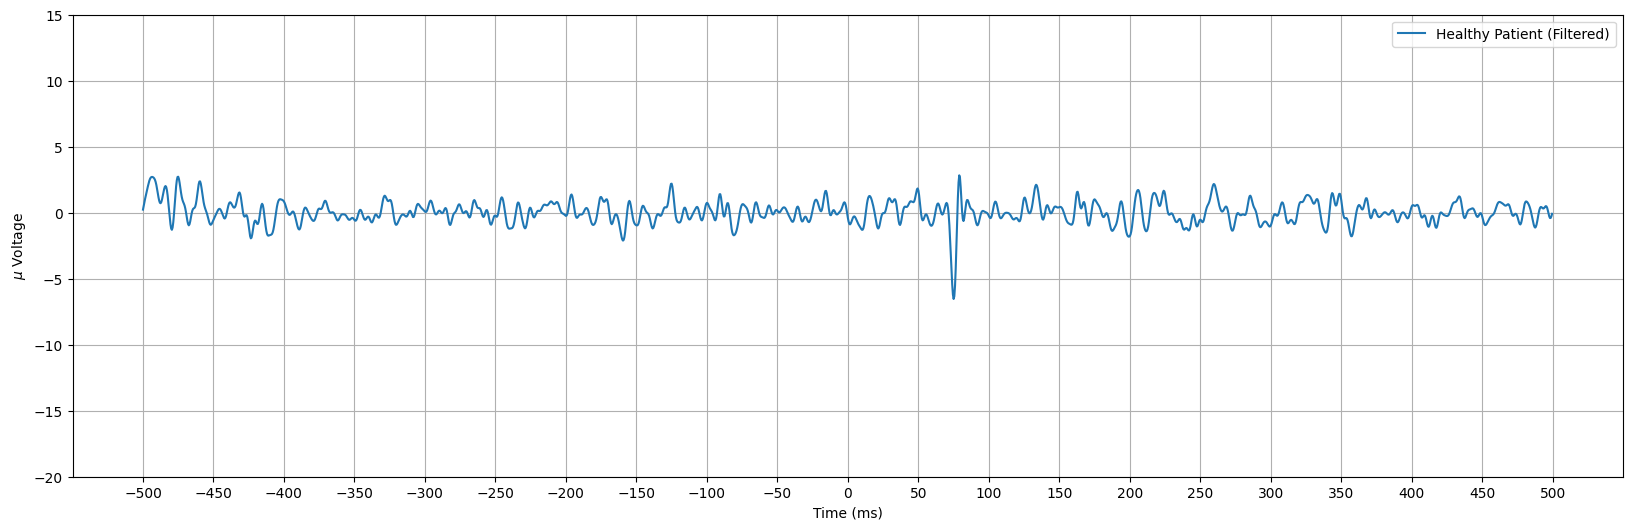

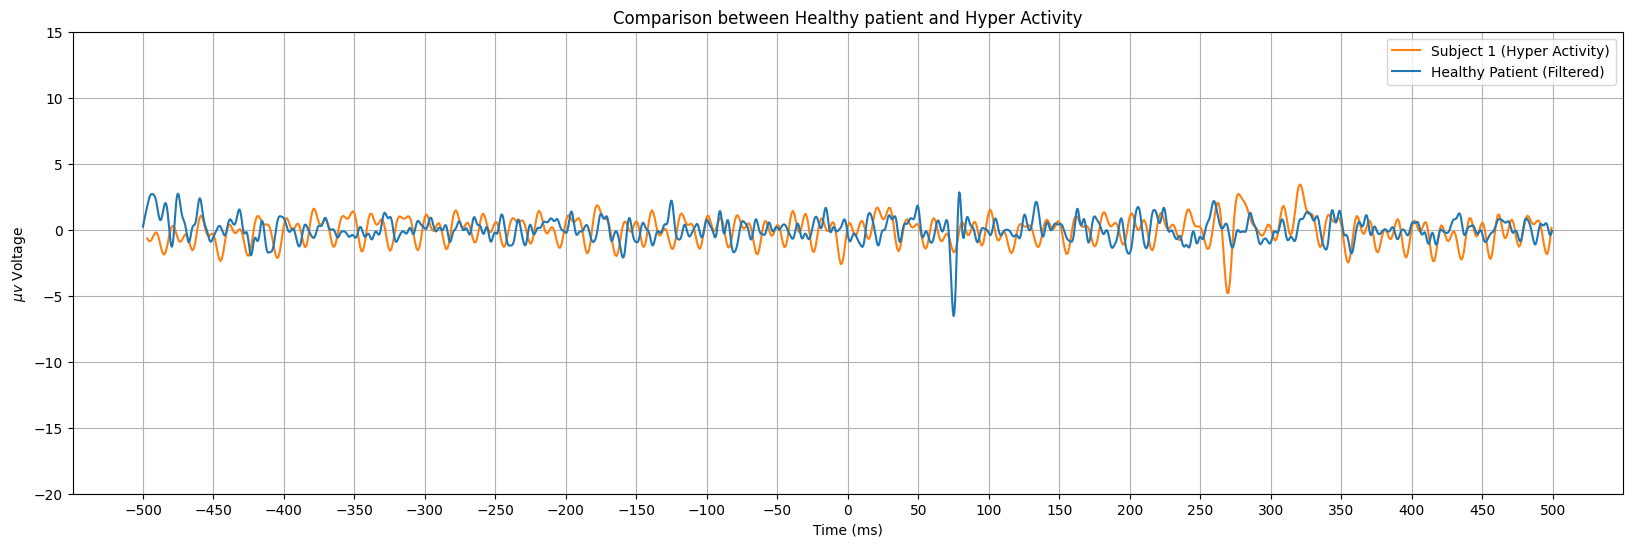

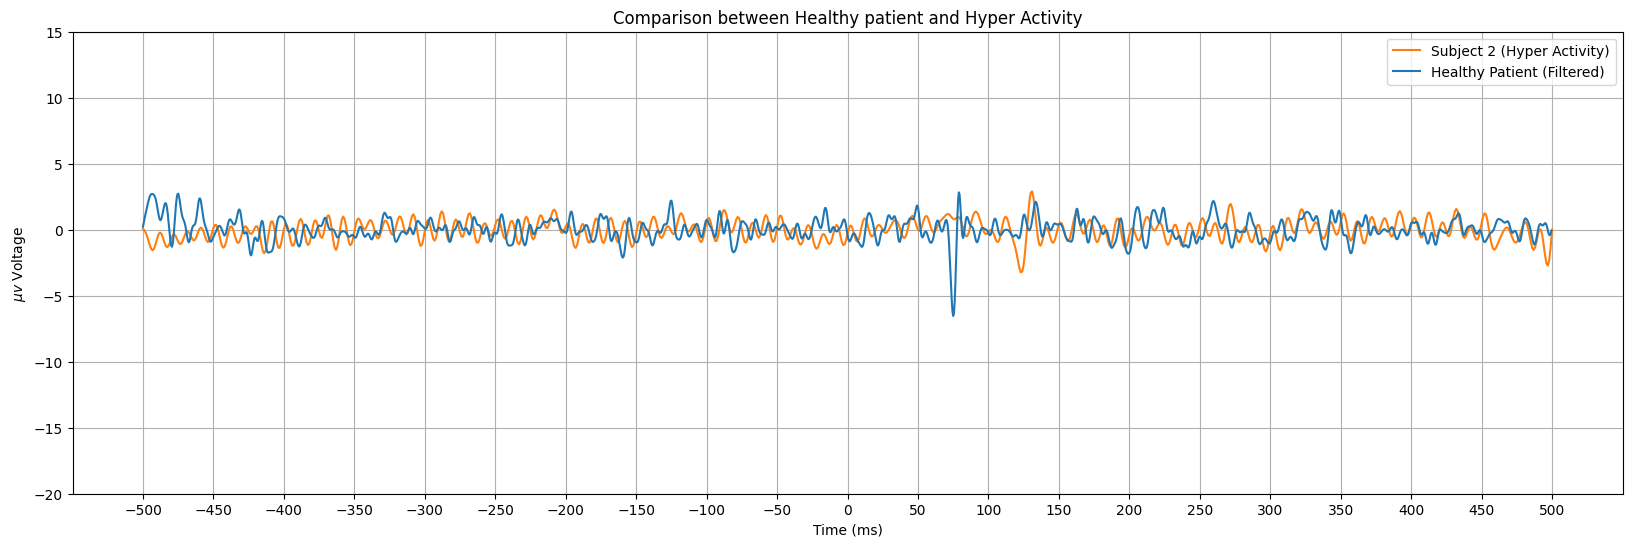

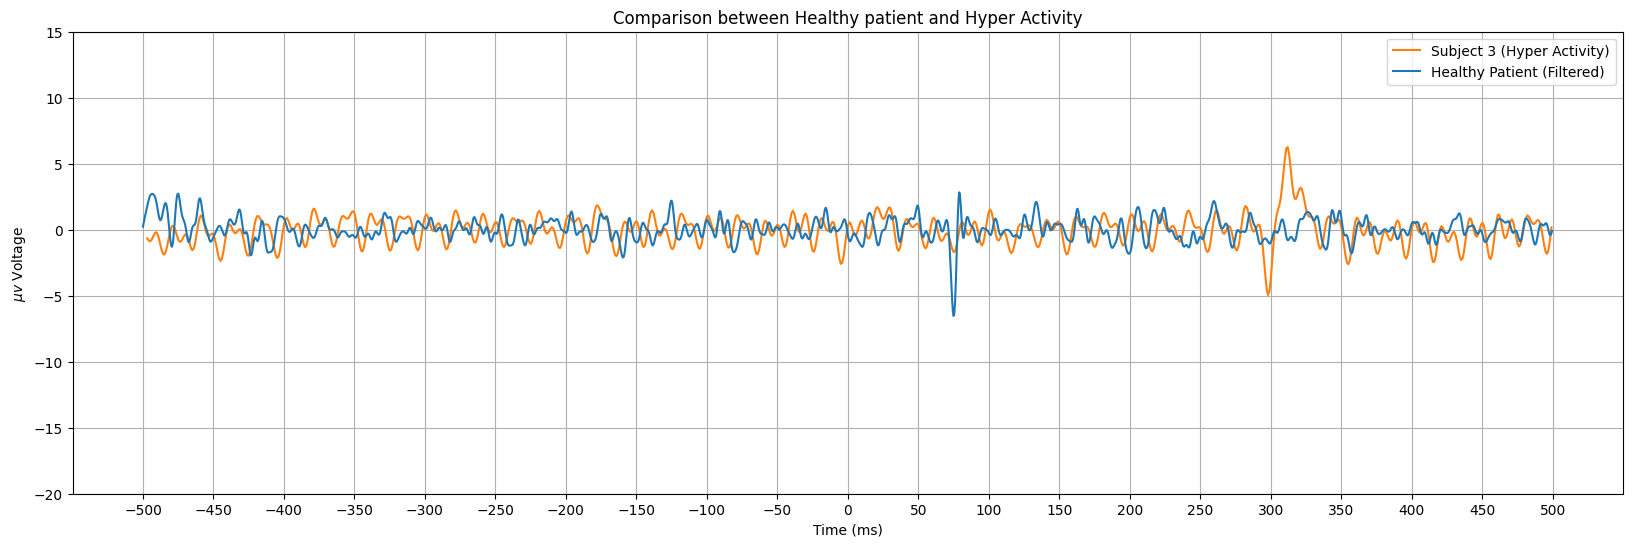

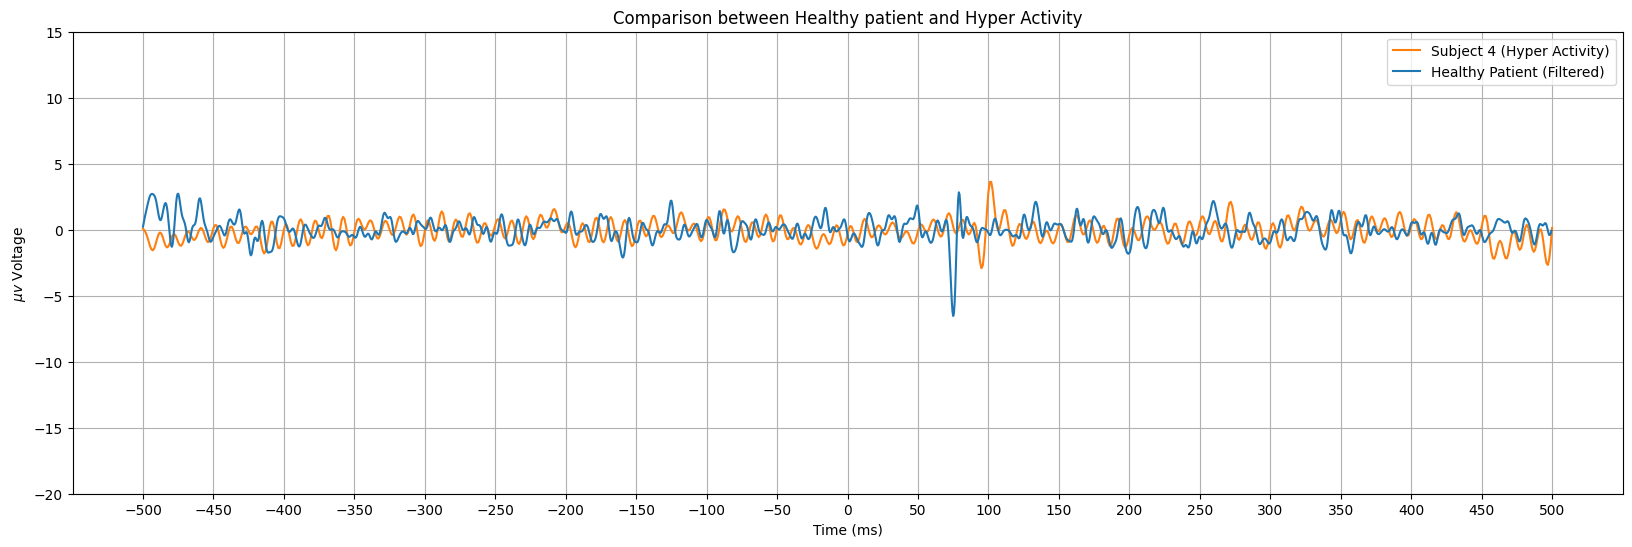

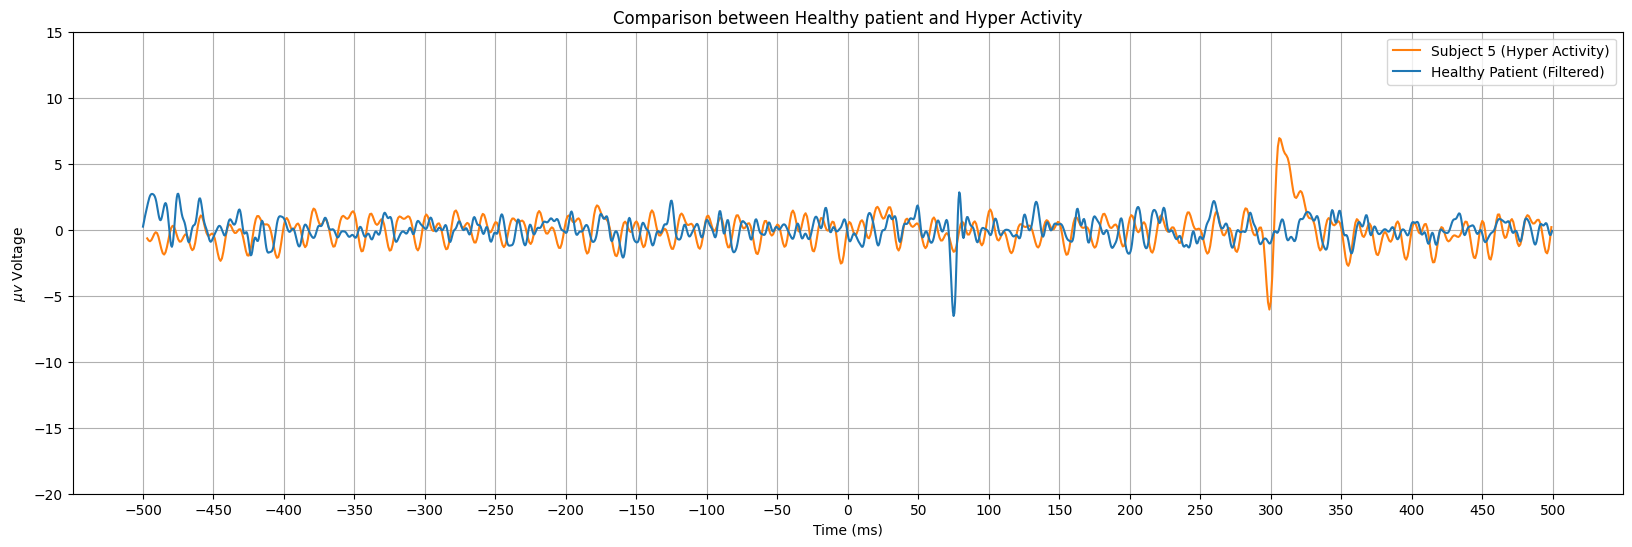

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    """
    Create a Butterworth bandpass filter.

    Parameters:
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - b, a: Numerator (b) and denominator (a) of the filter.
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Apply a Butterworth bandpass filter to EEG data.

    Parameters:
    - data: Input EEG data.
    - lowcut: Lower cutoff frequency.
    - highcut: Upper cutoff frequency.
    - fs: Sampling frequency.
    - order: Filter order.

    Returns:
    - y: Filtered EEG data.
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

try:
    # Mount Google Drive to access files if needed
    from google.colab import drive
    drive.mount('/content/drive')

    # Define the file path for CSV 7 (ERRP of healthy patients)
    healthy_patient_file = '/content/drive/MyDrive/paperpub/ref/ref1new.csv'

    # List of file paths for subjects with learning disability
    learning_disability_files = ['/content/drive/MyDrive/paperpub/HyperActivity/H1newedit.csv',
                                 '/content/drive/MyDrive/paperpub/HyperActivity/H2edit2222.csv',
                                 '/content/drive/MyDrive/paperpub/HyperActivity/3.csv',
                                 '/content/drive/MyDrive/paperpub/HyperActivity/4ed.csv',
                                 '/content/drive/MyDrive/paperpub/HyperActivity/555555 (1).csv']

    # Sampling frequency for EEG data
    fs = 450.0  # Sampling frequency

    # Cutoff frequencies for the bandpass filter
    lowcut = 1.0  # Low cutoff frequency
    highcut = 50.0  # High cutoff frequency

    # Read the CSV file for healthy patients into a DataFrame
    df_healthy = pd.read_csv(healthy_patient_file, encoding='latin-1')

    # Check if 'x' and 'y' columns exist in the DataFrame
    if 'x' not in df_healthy.columns or 'y' not in df_healthy.columns:
        raise ValueError("The columns 'x' and 'y' do not exist in the healthy patient DataFrame.")

    # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
    x_values_healthy = df_healthy['x'].values * 1000  # Convert to milliseconds
    y_values_healthy = df_healthy['y'].values

    # Apply Butterworth bandpass filter to EEG data for healthy patients
    y_values_healthy_filtered = butter_bandpass_filter(y_values_healthy, lowcut, highcut, fs)

    # Plotting graph for healthy patients (CSV 7)
    plt.figure(figsize=(20, 6))
    plt.plot(x_values_healthy, y_values_healthy_filtered, color='#1f77b4', label='Healthy Patient (Filtered)')
    plt.xlabel('Time (ms)')
    plt.ylabel('$\mu $ Voltage')
    plt.legend()
    plt.grid(True)
    plt.ylim(-20, 15)  # Set y-axis limits
    plt.xticks(range(-500, 501, 50))  # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
    plt.show()

    # Iterate over each file path for subjects with learning disability
    for idx, learning_file in enumerate(learning_disability_files, start=1):
        # Read the CSV file for subjects with learning disability into a DataFrame
        df_learning = pd.read_csv(learning_file, encoding='latin-1')

        # Check if 'x' and 'y' columns exist in the DataFrame
        if 'x' not in df_learning.columns or 'y' not in df_learning.columns:
            raise ValueError(f"The columns 'x' and 'y' do not exist in the learning disability DataFrame {idx}.")

        # Assuming your CSV has two columns named 'x' and 'y', change accordingly if needed
        x_values_learning = df_learning['x'].values * 1000  # Convert to milliseconds
        y_values_learning = df_learning['y'].values

        # Apply Butterworth bandpass filter to EEG data for subjects with learning disability
        y_values_learning_filtered = butter_bandpass_filter(y_values_learning, lowcut, highcut, fs)

        # Plotting individual graph for subjects with learning disability compared to healthy patients (CSV 7)
        plt.figure(figsize=(20, 6))
        plt.plot(x_values_learning, y_values_learning_filtered, color='#ff7f0e', label=f'Subject {idx} (Hyper Activity)')
        plt.plot(x_values_healthy, y_values_healthy_filtered, color='#1f77b4', label='Healthy Patient (Filtered)')
        plt.xlabel('Time (ms)')
        plt.ylabel('$\mu v$ Voltage ')
        plt.title('Comparison between Healthy patient and Hyper Activity')
        plt.legend()
        plt.grid(True)
        plt.ylim(-20, 15)  # Set y-axis limits
        plt.xticks(range(-500, 501, 50))  # Set x-axis ticks from -500 ms to 500 ms with 50 ms intervals
        plt.show()

except FileNotFoundError:
    print("One of the specified CSV files does not exist.")
except pd.errors.EmptyDataError:
    print("One of the CSV files is empty or does not contain any data.")
except pd.errors.ParserError:
    print("Error parsing one of the CSV files. Make sure the files are properly formatted.")
except ValueError as ve:
    print(ve)
except Exception as e:
    print(f"An error occurred: {e}")
